In [500]:
#importing the necessary libraries
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import sklearn
import seaborn as sns

In [501]:
#importing the data set
from sklearn.datasets import load_boston
boston = load_boston()
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [502]:
#printing the description of dataset
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [503]:
#creating dataframe
data = pd.DataFrame(boston.data, columns = boston.feature_names)

In [504]:
#target variable
(boston.target)[0:10]

array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9])

In [505]:
#mutating in dataset
data["TARGET"] = boston.target

In [506]:
#checking head of data
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,TARGET
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [507]:
data.shape

(506, 14)

In [508]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  TARGET   506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


In [509]:
#checking the null values
data.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
TARGET     0
dtype: int64

no column has null values

In [510]:
#checking description of data
data.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,TARGET
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


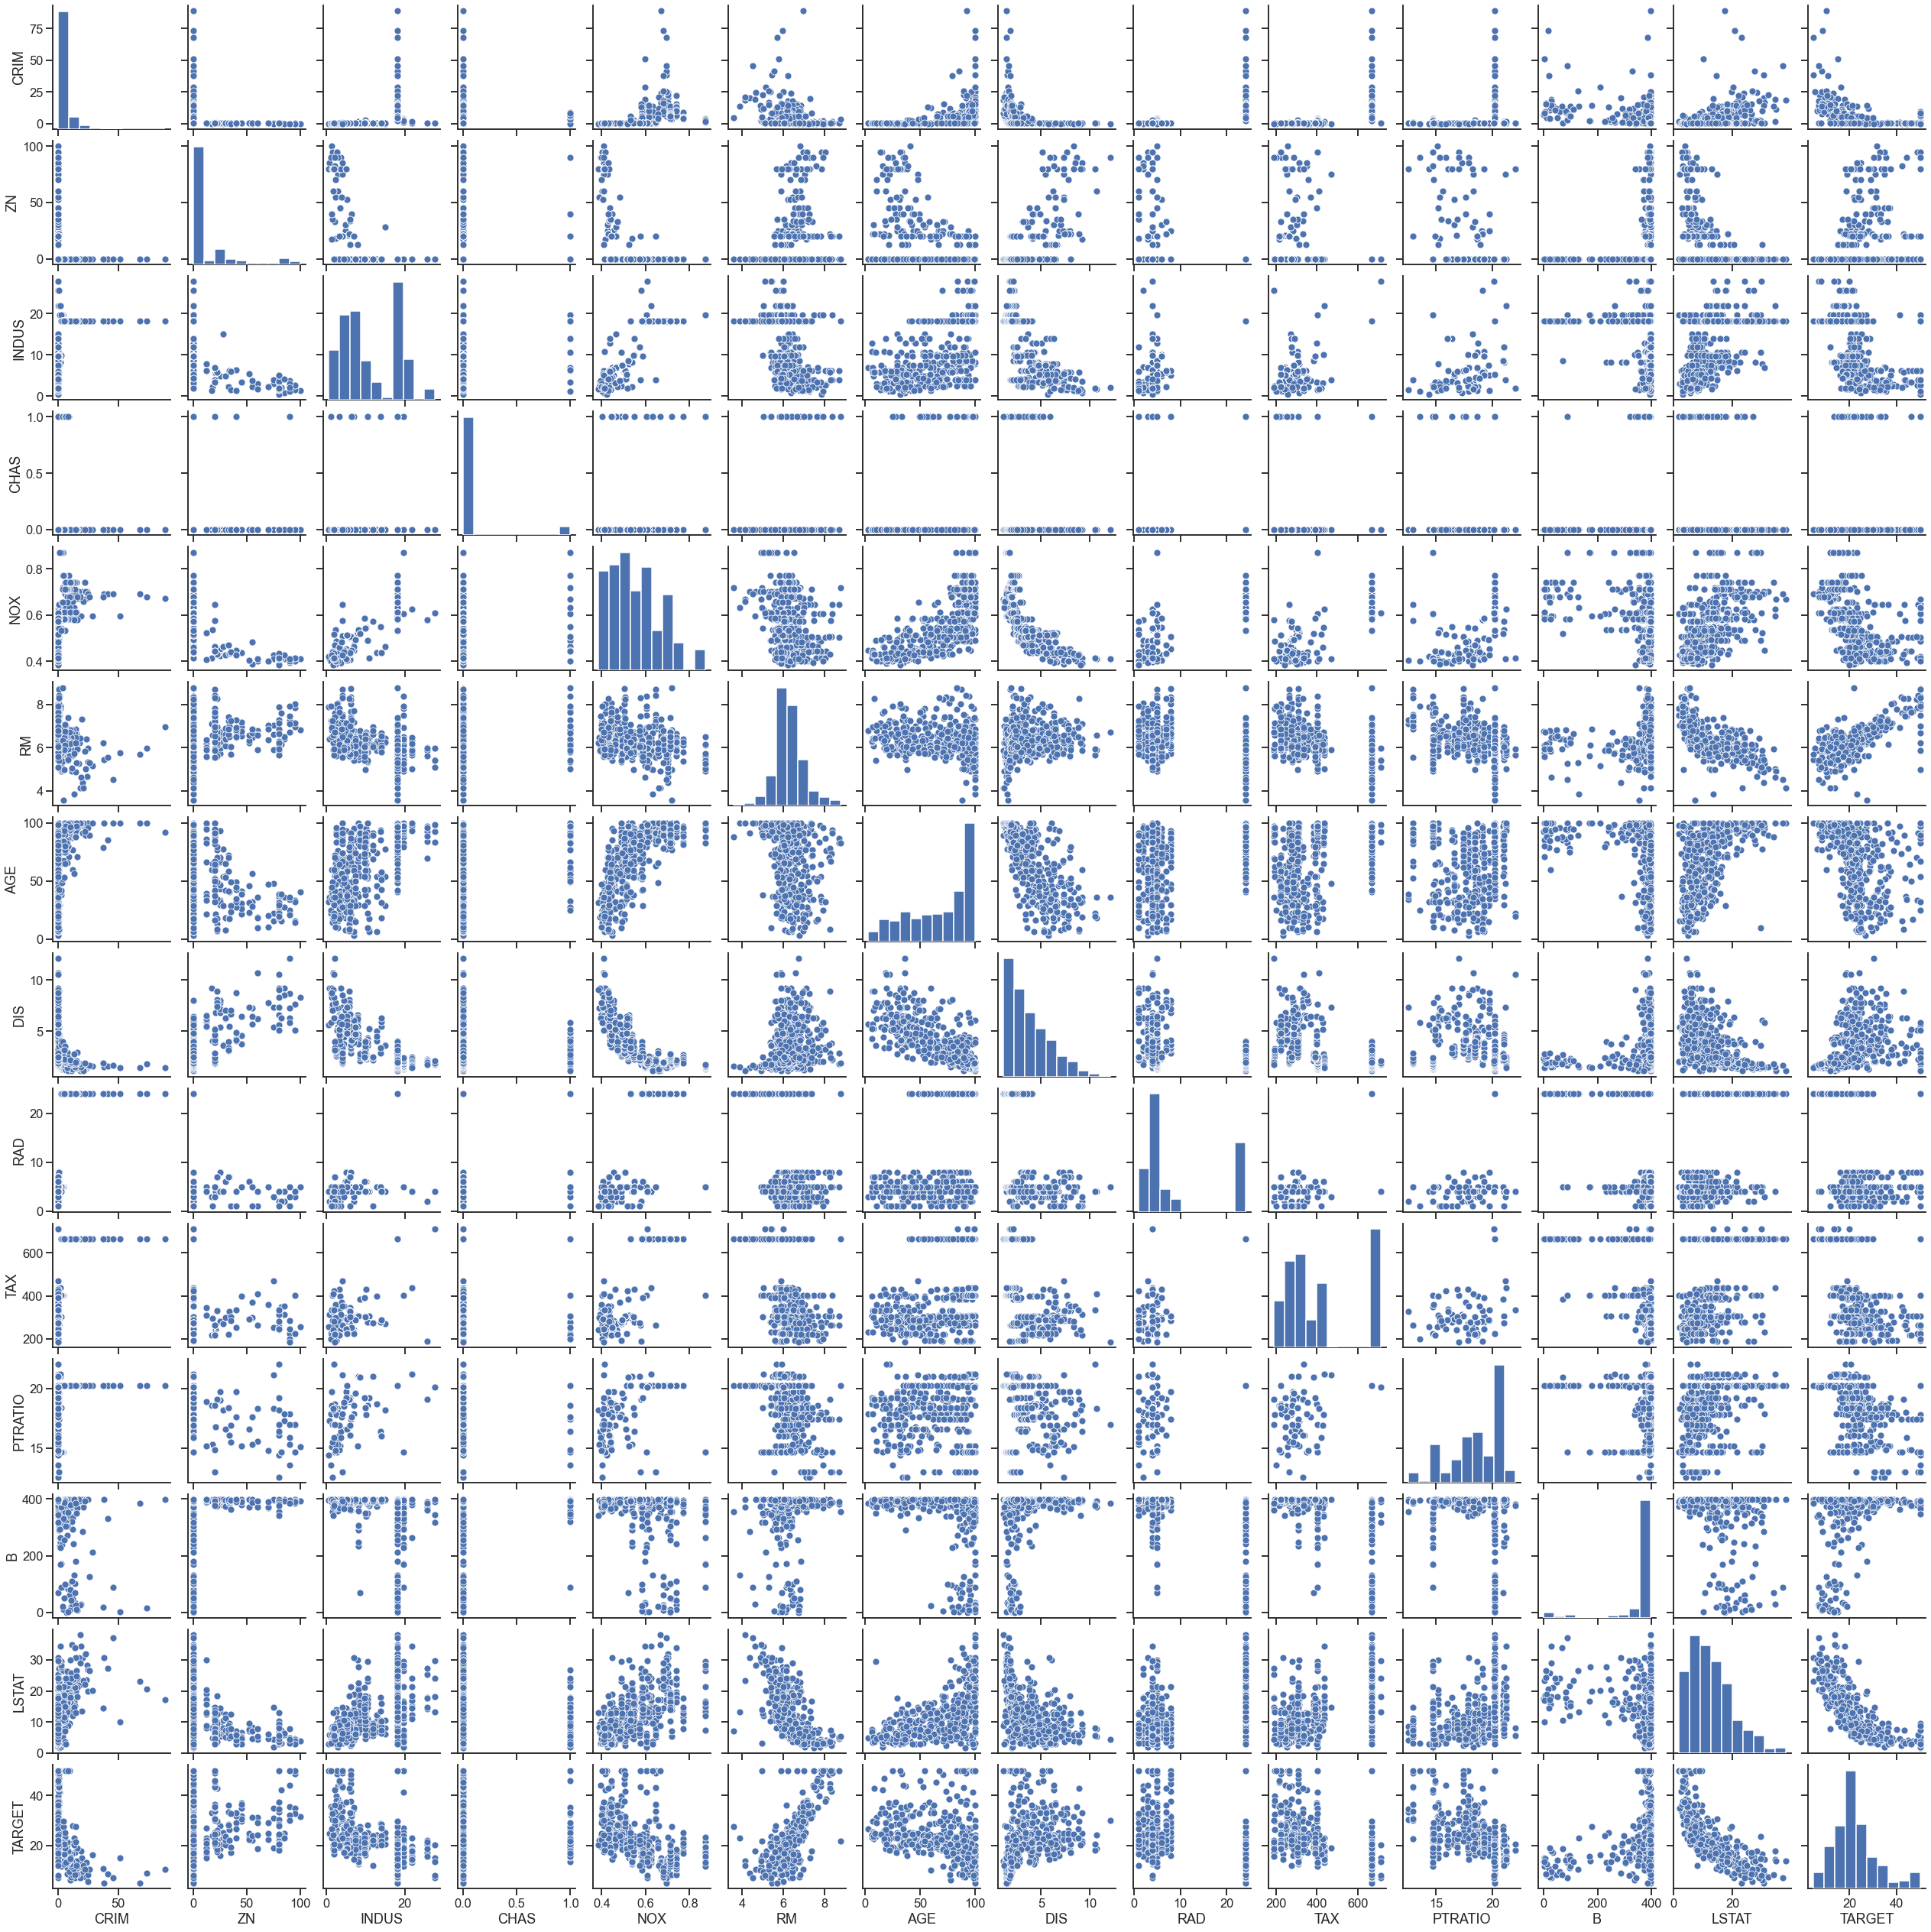

In [511]:
#plotting pair plot to check relationshiop between all variables
sns.pairplot(data)

from the above pair plot it can be observed that variable RM and LSTAT shows liner relationship with Target variables

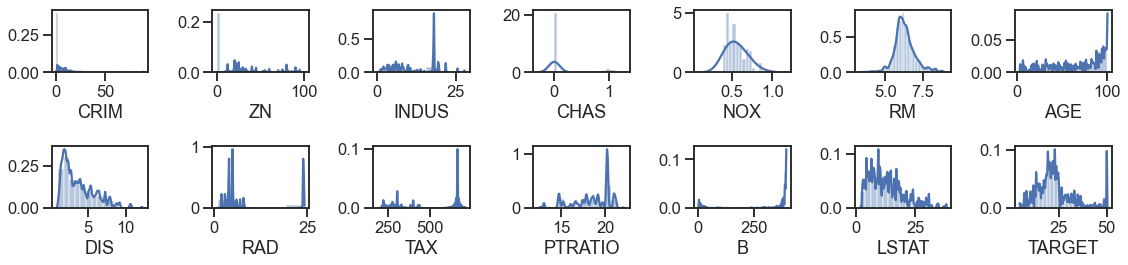

In [512]:
#plotting distribution plot to check distribution pattern of each variable

rows = 2
cols = 7

fig, ax = plt.subplots(nrows= rows, ncols= cols, figsize=(16,4))

col=data.columns
index = 0

for i in range(rows):
    for j in range(cols):
        sns.distplot(data[col[index]],kde_kws={'bw': 0.1}, ax = ax[i][j])
        index = index +1

plt.tight_layout()

In [513]:
# seperating dependent and independent variables
X = data.drop(["TARGET"], axis = 1)
y = data.TARGET

In [514]:
#importing standard scaler and fitting to X
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_scaled = sc.fit_transform(X)

In [515]:
#importing vif and calculating for X scaled
import statsmodels
from statsmodels.stats.outliers_influence import variance_inflation_factor
variables = X_scaled

In [516]:
# we create a new data frame which will include all the VIFs
# note that each variable has its own variance inflation factor as this measure is variable specific (not model specific)
# we do not include categorical values for mulitcollinearity as they do not provide much information as numerical ones do
vif = pd.DataFrame()

# here we make use of the variance_inflation_factor, which will basically output the respective VIFs 
vif["VIF"] = [variance_inflation_factor(variables, i) for i in range(variables.shape[1])]
# Finally, I like to include names so it is easier to explore the result
vif["Features"] = X.columns

In [517]:
vif

,VIF,Features
0,1.792192,CRIM
1,2.298758,ZN
2,3.991596,INDUS
3,1.073995,CHAS
4,4.393720,NOX
5,1.933744,RM
6,3.100826,AGE
7,3.955945,DIS
8,7.484496,RAD
9,9.008554,TAX


In [518]:
#dropping the columns RAD and TAX as these columns has vif > 5
data.drop(["RAD" , "TAX"], axis=1, inplace=True)

In [519]:
#calculating correlation matrix
corrmat = data.corr()
corrmat

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,PTRATIO,B,LSTAT,TARGET
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.289946,-0.385064,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.121515,0.048788,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.355501,0.128069,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.232471,0.291512,-0.496996,0.249929
PTRATIO,0.289946,-0.391679,0.383248,-0.121515,0.188933,-0.355501,0.261515,-0.232471,1.000000,-0.177383,0.374044,-0.507787
B,-0.385064,0.175520,-0.356977,0.048788,-0.380051,0.128069,-0.273534,0.291512,-0.177383,1.000000,-0.366087,0.333461


In [520]:
corrmat.index

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'PTRATIO',
       'B', 'LSTAT', 'TARGET'],
      dtype='object')

<AxesSubplot:>

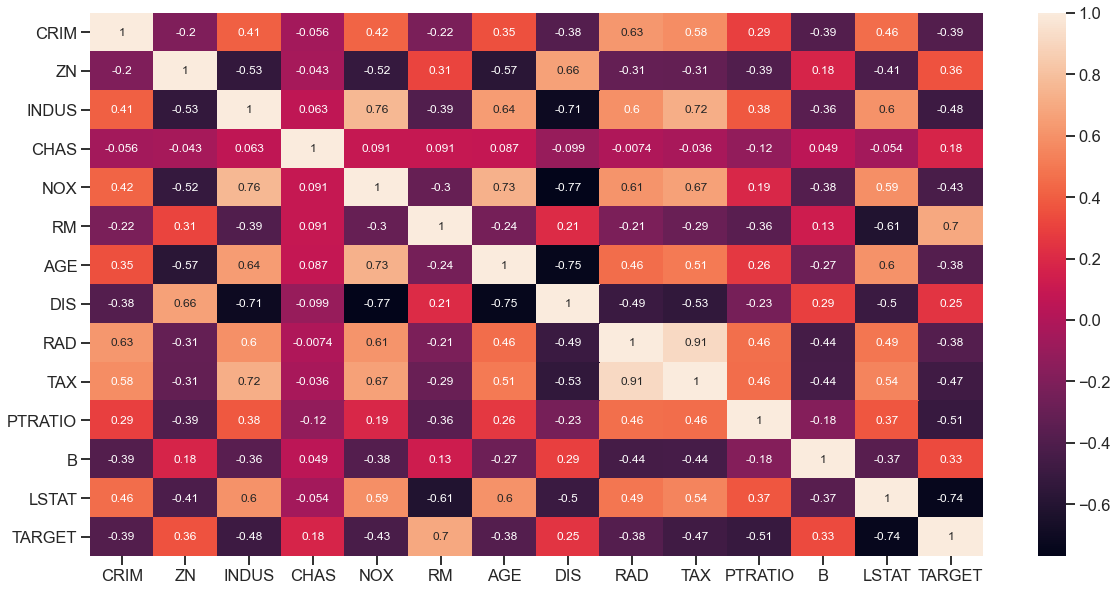

In [521]:
#creating heatmap for correlation matrics data
fig, ax = plt.subplots(figsize = (20,10), facecolor = "w")
sns.heatmap(corrdata1, annot=True, annot_kws={"size" : 12})

In [522]:
#from above heatmap we can conclude that variables RM and LSTAT shows correlation with target variable more than 0.7

In [523]:
#reating a function to check correlation of variables at required thresholds
def getCorrelatedFeature(corrdata,threshold):
    feature = []
    value = []
    
    for i, index in enumerate(corrdata.index):
        if abs(corrdata[index]) > threshold:
            feature.append(index)
            value.append(corrdata[index])
            
    df = pd.DataFrame(data = value, index = feature, columns = ["corr value"])
    return df

In [524]:
#checking variables showing correlation with greater than 0.5
threshold = 0.5
corr_value = getCorrelatedFeature(corrmat["TARGET"], threshold)
corr_value

,corr value
RM,0.695360
PTRATIO,-0.507787
LSTAT,-0.737663
TARGET,1.000000


In [525]:
#variables 'RM', 'PTRATIO', 'LSTAT' shows correlation with greater than 0.5

In [526]:
corr_value.index

Index(['RM', 'PTRATIO', 'LSTAT', 'TARGET'], dtype='object')

In [527]:
#creating correlated data
correlated_data = data[corr_value.index]
correlated_data.head()

,RM,PTRATIO,LSTAT,TARGET
0,6.575,15.3,4.98,24.0
1,6.421,17.8,9.14,21.6
2,7.185,17.8,4.03,34.7
3,6.998,18.7,2.94,33.4
4,7.147,18.7,5.33,36.2


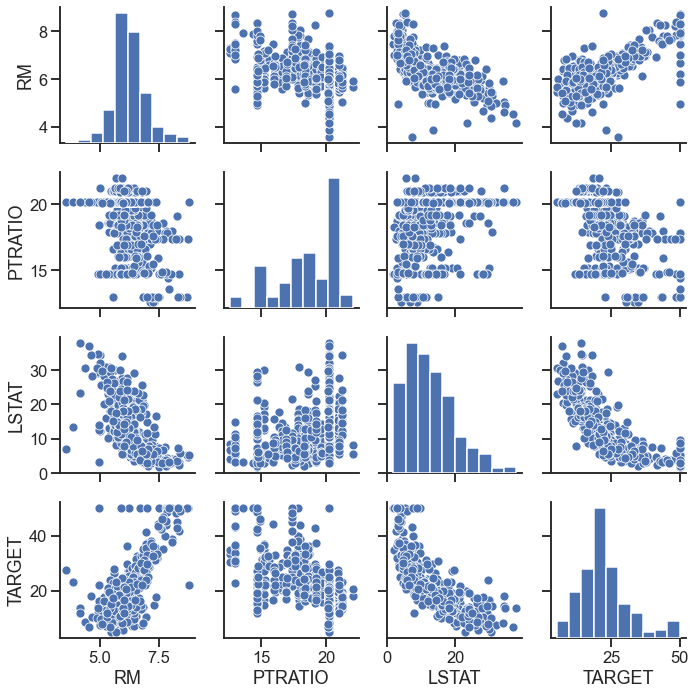

In [528]:
#creating pair plot for correlated data
sns.pairplot(correlated_data)
plt.tight_layout()

<AxesSubplot:>

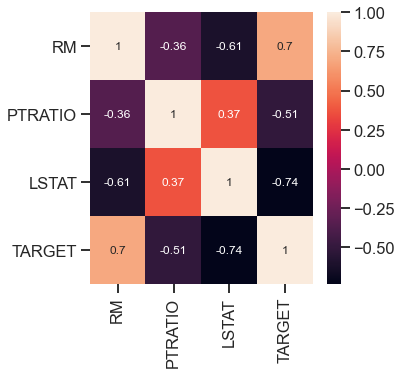

In [529]:
#creating heat map for correlated data
fig, ax = plt.subplots(figsize = (5,5), facecolor = "w")
sns.heatmap(correlated_data.corr(), annot=True, annot_kws={"size" : 12})

In [530]:
correlated_data.head()

,RM,PTRATIO,LSTAT,TARGET
0,6.575,15.3,4.98,24.0
1,6.421,17.8,9.14,21.6
2,7.185,17.8,4.03,34.7
3,6.998,18.7,2.94,33.4
4,7.147,18.7,5.33,36.2


In [531]:
# seperating dependent and independent variables
X = correlated_data.drop(["TARGET"], axis=True)
y = correlated_data["TARGET"]
X.head()

,RM,PTRATIO,LSTAT
0,6.575,15.3,4.98
1,6.421,17.8,9.14
2,7.185,17.8,4.03
3,6.998,18.7,2.94
4,7.147,18.7,5.33


ValueError: Could not interpret input 'TARGET'

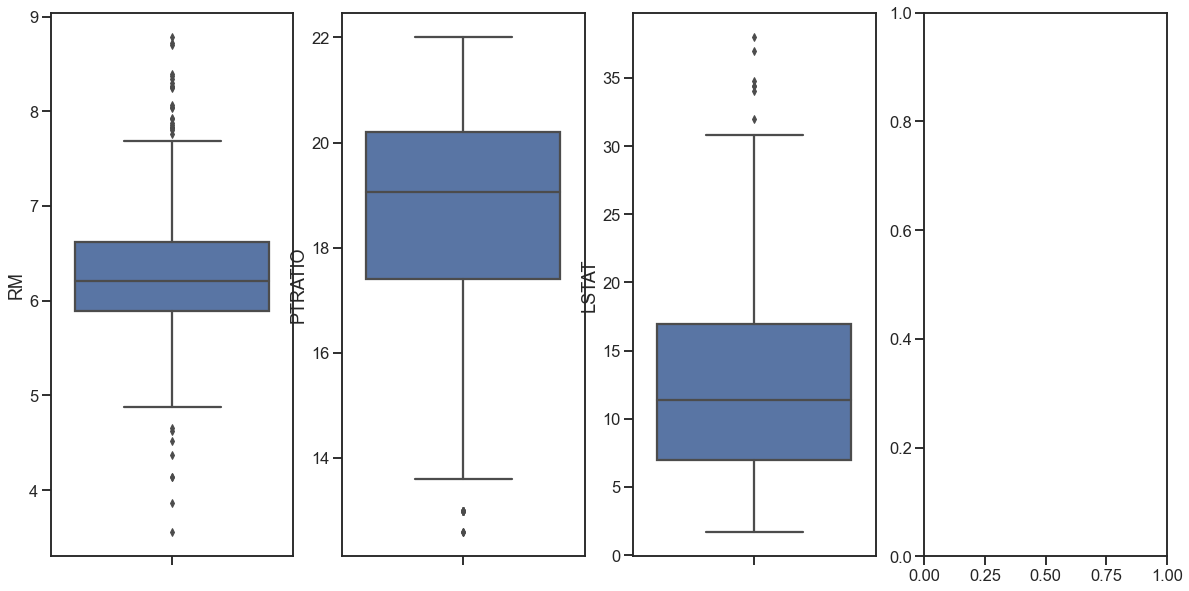

In [532]:
#plottinf box plot for independent variables of correlated data
fig, axs = plt.subplots(ncols=4, figsize=(20, 10))
index = 0
axs = axs.flatten()
for k,v in correlated_data.items():
    sns.boxplot(y=k, data=X, ax=axs[index])
    index += 1
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

it can be observed that target variable has outliers

In [ ]:
#calculating IQR , lower and upper bound for correlated data
Q1 = correlated_data.TARGET.quantile(0.25)
Q2 = correlated_data.TARGET.quantile(0.75)
IQR = Q2 - Q1
lowerbound = Q1 - 1.5*IQR
upperbound = Q2 + 1.5*IQR

lowerbound,upperbound

In [ ]:
#removing outliers from Target variable
data = correlated_data[(correlated_data.TARGET > lowerbound) | (correlated_data.TARGET < upperbound)]

In [ ]:
#seperating independent and dependent variables from correlated data
X = correlated_data.drop("TARGET", axis = True)
y = correlated_data.TARGET

In [ ]:
#creating scatter plot for X correlated variables
plt.figure(figsize=(20,30))
plotnumber = 1
for column in X:
    if plotnumber <= 14:
        ax = plt.subplot(5,3,plotnumber)
        plt.scatter(X[column], y)
        plt.xlabel(column, fontsize = 20)
        plt.ylabel("Price", fontsize = 20)
    plotnumber = plotnumber + 1
plt.tight_layout()

In [ ]:
#splitting correlated data into train and test
X_train, X_test, y_train, y_test = train_test_split( X, y , test_size = 0.2, random_state = 24 )

In [ ]:
#fitting the modle
lm.fit(X_train, y_train)

In [ ]:
#checking y predict values
y_predict = lm.predict(X_test)
y_predict

In [ ]:
#Checking accuracy of modle
lm.score(X_test,y_test)

In [ ]:
#importing R squared
from sklearn.metrics import r2_score

In [ ]:
#checking R squared
score = r2_score(y_test,y_predict)
score

In [ ]:
#Creating regression plot
rows = 2
cols = 2
fig, ax = plt.subplots(nrows = rows, ncols = cols, figsize=(16,6))

col = correlated_data.columns
index = 0

for i in range(rows):
    for j in range(cols):
        sns.regplot(x = correlated_data[col[index]], y = correlated_data["TARGET"], ax = ax[i][j])
        index = index +1
    fig.tight_layout()